In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

filePath = "D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_casos_covid_CABA.csv"
casos = pd.read_csv(filePath, parse_dates=['fecha_clasificacion'])

def setRangoEtario(edad):
    if edad < 30:
        return '30 o menos'
    elif edad < 40:
        return '31 a 40'
    elif edad < 50:
        return '41 a 50'
    elif edad < 60:
        return '51 a 60'
    elif edad < 70:
        return '61 a 70'
    elif edad < 80:
        return '71 a 80'
    elif edad < 90:
        return '81 a 90'
    else :
        return '91 o mas'

casos['grupo_etario'] = casos.apply(lambda x: setRangoEtario(x['edad']), axis=1)
# casos.head()

casos['fecha_clasificacion'] = pd.to_datetime(casos['fecha_clasificacion'], format='%d%b%Y:%H:%M:%S.%f')
casos.head()

C:\Users\Guti\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio,grupo_etario
0,5691075,29DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,2021-01-18,CABA,RECOLETA,2.0,femenino,68.0,confirmado,NaN,NaN,NaN,Comunitario,61 a 70
1,5691704,29DEC2020:00:00:00.000000,28DEC2020:00:00:00.000000,2021-01-19,CABA,NUEVA POMPEYA,4.0,masculino,56.0,confirmado,NaN,NaN,NaN,Comunitario,51 a 60
2,5693823,29DEC2020:00:00:00.000000,23DEC2020:00:00:00.000000,2020-12-29,CABA,NUÑEZ,13.0,femenino,40.0,confirmado,NaN,NaN,NaN,Comunitario,41 a 50
3,5695125,29DEC2020:00:00:00.000000,26DEC2020:00:00:00.000000,2021-01-06,CABA,NUÑEZ,13.0,femenino,52.0,confirmado,NaN,NaN,NaN,En Investigación,51 a 60
4,5696893,29DEC2020:00:00:00.000000,30DEC2020:00:00:00.000000,2020-12-31,CABA,VELEZ SARSFIELD,10.0,masculino,79.0,confirmado,NaN,NaN,NaN,Comunitario,71 a 80


In [19]:
fechaCount = casos.groupby("fecha_clasificacion")["numero_de_caso"].count()
nuevoDF = fechaCount.reset_index().rename(columns={'numero_de_caso': 'count'})
type(fechaCount)
# fechaCount.head()

pandas.core.series.Series

<AxesSubplot:xlabel='fecha_clasificacion'>

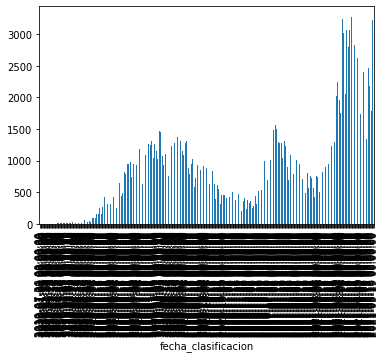

In [5]:
fechaCount.plot(kind="bar")

<AxesSubplot:title={'center':'Cantidades de casos por edades'}, ylabel='numero_de_caso'>

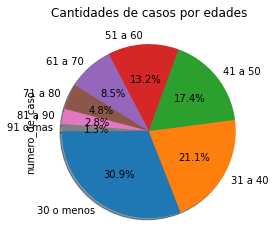

In [6]:
cg = casos.groupby(['grupo_etario'])['numero_de_caso'].count()
cg.plot(kind="pie", shadow=True, startangle=180, autopct='%1.1f%%', title='Cantidades de casos por edades')

<AxesSubplot:xlabel='fecha_clasificacion'>

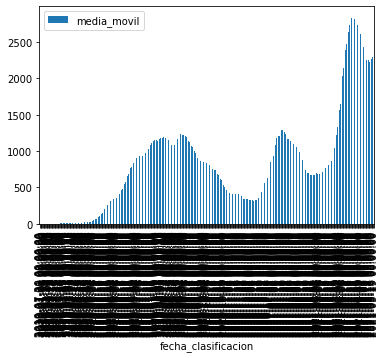

In [32]:
#media móvil

tamañoVentana = 14
# fechaCount["media_movil"] = fechaCount.rolling(tamañoVentana).mean()
# fechaCount["media_movil"]

# nuevoDF.describe()
# nuevoDF.head(200)
nuevoDF["media_movil"] = nuevoDF["count"].rolling(tamañoVentana).mean()
# nuevoDF["count"] = pd.to_numeric(nuevoDF["count"])

# nuevoDF["count"] = nuevoDF["count"].astype(str).astype(int)
type(nuevoDF)
nuevoDF.head(10)
# pd.unique(nuevoDF["count"])
# nuevoDF.columns()
# nuevoDF.head(200)
nuevoDF[['fecha_clasificacion', 'media_movil']].head(20)

nuevoDF[['fecha_clasificacion', 'media_movil']].plot(y='media_movil', x='fecha_clasificacion', kind="bar")

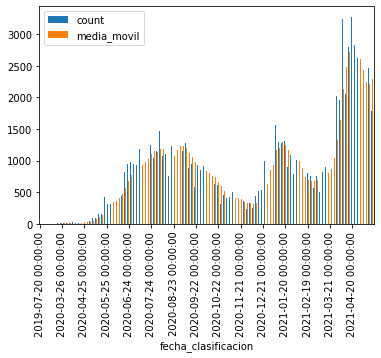

In [37]:
nuevoDF.plot(x='fecha_clasificacion', kind="bar").locator_params(axis="x", nbins=15)